# Imputation of missing values

For various reasons, many real world datasets contain missing values, often encoded as blanks, NaN (Not-a-Number)s or other placeholders. Such datasets however are incompatible withmost libraries' functions andn estimators which assume that all values in an array are numerical, and that all have and hold meaning.

 A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to impute the missing values, i.e., to infer them from the known part of the data. See the glossary entry on imputation.

In [2]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Filling Missing ESG Data

### Example 1 [simple case]: Handling Missing Data in ESG Scores
 

In [3]:
data = {
    'Company': ['Company A', 'Company B', 'Company C', 'Company D', 'Company E'],
    'ESG_Score': [50, np.nan, 75, 85, np.nan],
    'Environment_Score': [30, 40, np.nan, 70, 60],
    'Social_Score': [np.nan, 55, 60, np.nan, 50],
    'Governance_Score': [70, np.nan, 80, 85, np.nan]
}

df = pd.DataFrame(data)
print("Original Data:")
display(df)

Original Data:


,Company,ESG_Score,Environment_Score,Social_Score,Governance_Score
0,Company A,50.0,30.0,NaN,70.0
1,Company B,NaN,40.0,55.0,NaN
2,Company C,75.0,NaN,60.0,80.0
3,Company D,85.0,70.0,NaN,85.0
4,Company E,NaN,60.0,50.0,NaN


#### Mean Imputation
In this method, missing values are replaced by the mean of the corresponding column.
- Mean imputation replaces missing values with the mean of the column.
- This method assumes that missing values are randomly distributed, but it can be affected by outliers.

In [4]:
# Imputation with the mean value
mean_imputer = SimpleImputer(strategy='mean')
df_mean = df.copy()
df_mean[['ESG_Score', 'Environment_Score', 'Social_Score', 'Governance_Score']] = mean_imputer.fit_transform(df[['ESG_Score', 'Environment_Score', 'Social_Score', 'Governance_Score']])

print("\nMean Imputation:")
display(df_mean)


Mean Imputation:


,Company,ESG_Score,Environment_Score,Social_Score,Governance_Score
0,Company A,50.0,30.0,55.0,70.000000
1,Company B,70.0,40.0,55.0,78.333333
2,Company C,75.0,50.0,60.0,80.000000
3,Company D,85.0,70.0,55.0,85.000000
4,Company E,70.0,60.0,50.0,78.333333


#### Median Imputation
In this method, missing values are replaced by the median of the corresponding column.
- Median imputation is less sensitive to outliers compared to mean imputation.
- It is useful when the data is skewed, as it replaces missing values with the middle value of the column.

In [5]:
# Imputation with the median value
median_imputer = SimpleImputer(strategy='median')
df_median = df.copy()
df_median[['ESG_Score', 'Environment_Score', 'Social_Score', 'Governance_Score']] = median_imputer.fit_transform(df[['ESG_Score', 'Environment_Score', 'Social_Score', 'Governance_Score']])

print("\nMedian Imputation:")
display(df_median)


Median Imputation:


,Company,ESG_Score,Environment_Score,Social_Score,Governance_Score
0,Company A,50.0,30.0,55.0,70.0
1,Company B,75.0,40.0,55.0,80.0
2,Company C,75.0,50.0,60.0,80.0
3,Company D,85.0,70.0,55.0,85.0
4,Company E,75.0,60.0,50.0,80.0


#### Mode Imputation (Most Frequent)
In this method, missing values are replaced by the most frequent value (mode) in the corresponding column.
- Mode imputation replaces missing values with the most frequent value in the column.
- This method is particularly useful for categorical data but can also be applied to numerical data when the distribution has clear frequency patterns.

In [6]:
# Imputation with the most frequent (mode) value
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode = df.copy()
df_mode[['ESG_Score', 'Environment_Score', 'Social_Score', 'Governance_Score']] = mode_imputer.fit_transform(df[['ESG_Score', 'Environment_Score', 'Social_Score', 'Governance_Score']])

print("\nMode (Most Frequent) Imputation:")
display(df_mode)


Mode (Most Frequent) Imputation:


,Company,ESG_Score,Environment_Score,Social_Score,Governance_Score
0,Company A,50.0,30.0,50.0,70.0
1,Company B,50.0,40.0,55.0,70.0
2,Company C,75.0,30.0,60.0,80.0
3,Company D,85.0,70.0,50.0,85.0
4,Company E,50.0,60.0,50.0,70.0


#### Constant Imputation
In this method, missing values are replaced by a constant value provided by the user (e.g., zero or a specific domain-relevant value).
- Constant imputation allows you to replace missing values with a specific number.
- This method is useful when missing values have a meaningful replacement (e.g., filling missing numerical values with zero if they are assumed to have no impact).

In [7]:
# Imputation with a constant value (e.g., 0)
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)
df_constant = df.copy()
df_constant[['ESG_Score', 'Environment_Score', 'Social_Score', 'Governance_Score']] = constant_imputer.fit_transform(df[['ESG_Score', 'Environment_Score', 'Social_Score', 'Governance_Score']])

print("\nConstant Imputation (filling with 0):")
display(df_constant)


Constant Imputation (filling with 0):


,Company,ESG_Score,Environment_Score,Social_Score,Governance_Score
0,Company A,50.0,30.0,0.0,70.0
1,Company B,0.0,40.0,55.0,0.0
2,Company C,75.0,0.0,60.0,80.0
3,Company D,85.0,70.0,0.0,85.0
4,Company E,0.0,60.0,50.0,0.0


### K-Nearest Neighbors (KNN) Imputation

This advanced technique uses the k nearest neighbors to impute missing values based on similarity between samples.
- KNN imputation fills missing values by finding the k nearest samples (in terms of distance) and averaging their values.
- This method is more computationally intensive but often yields better results, as it considers the similarity between data points.

In [8]:
from sklearn.impute import KNNImputer

# Imputation with KNN
knn_imputer = KNNImputer(n_neighbors=2)
df_knn = df.copy()
df_knn[['ESG_Score', 'Environment_Score', 'Social_Score', 'Governance_Score']] = knn_imputer.fit_transform(df[['ESG_Score', 'Environment_Score', 'Social_Score', 'Governance_Score']])

print("\nKNN Imputation:")
display(df_knn)


KNN Imputation:


,Company,ESG_Score,Environment_Score,Social_Score,Governance_Score
0,Company A,50.0,30.0,57.5,70.0
1,Company B,62.5,40.0,55.0,75.0
2,Company C,75.0,55.0,60.0,80.0
3,Company D,85.0,70.0,55.0,85.0
4,Company E,80.0,60.0,50.0,82.5


#### How does KNN work?

In [10]:
# Example dataset with missing values
data = {
    'ESG_Score': [50, np.nan, 75, 85, np.nan, 60, 90],
    'Environment_Score': [30, 40, np.nan, 70, 60, np.nan, 95]
}

df = pd.DataFrame(data)
print("Original data table:")
display(df)

# Apply KNN Imputation
knn_imputer = KNNImputer(n_neighbors=2)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
print("Imputed data table:")
display(df_imputed)

Original data table:


,ESG_Score,Environment_Score
0,50.0,30.0
1,NaN,40.0
2,75.0,NaN
3,85.0,70.0
4,NaN,60.0
5,60.0,NaN
6,90.0,95.0


Imputed data table:


,ESG_Score,Environment_Score
0,50.0,30.0
1,67.5,40.0
2,75.0,82.5
3,85.0,70.0
4,67.5,60.0
5,60.0,50.0
6,90.0,95.0


### Understanding KNNImputer with Step-by-Step Calculations

We use **KNNImputer** to replace missing values (`NaN`) in the dataset by looking at the *k nearest rows* (neighbours) based on the distance between rows.

#### Original Data

| Row | ESG_Score | Environment_Score |
|-----|-----------|-------------------|
| 0   | 50.0      | 30.0              |
| 1   | NaN       | 40.0              |
| 2   | 75.0      | NaN               |
| 3   | 85.0      | 70.0              |
| 4   | NaN       | 60.0              |
| 5   | 60.0      | NaN               |
| 6   | 90.0      | 95.0              |

We set **`n_neighbors = 2`**, so each missing value is imputed from the **two nearest rows** (Euclidean distance, ignoring features that are NaN in both).

#### Step 1: Distance Formula

For two rows *i* and *j*: $d(i,j) = \sqrt{\sum_{f \in F_{ij}} (x_{i,f} - x_{j,f})^2}$

- $F_{ij}$: features where both rows have values.  
- Missing values are ignored when computing distance.

#### Step 2: Imputation of Each NaN

##### (a) Row 1, ESG_Score = NaN
- Known value: Environment_Score = 40
- Find neighbours by comparing Environment_Score distances.

Distances:
- Row 0: $|40-30| = 10$  
- Row 3: $|40-70| = 30$  
- Row 4: $|40-60| = 20$  
- Row 6: $|40-95| = 55$

Nearest 2: **Row 0 (ESG=50), Row 4 (ESG=NaN → ignored), Row 3 (ESG=85)**  
Valid neighbours: Row 0 (50), Row 3 (85)  

Imputation:  $\text{ESG}_1 = \frac{50 + 85}{2} = 67.5$


##### (b) Row 2, Environment_Score = NaN
- Known value: ESG_Score = 75
- Compare ESG_Score distances.

Distances:
- Row 0: $|75-50| = 25$  
- Row 3: $|75-85| = 10$  
- Row 5: $|75-60| = 15$  
- Row 6: $|75-90| = 15$

Nearest 2: **Row 3 (Env=70), Row 5 (Env=NaN → ignored), Row 6 (Env=95)**  
Valid neighbours: Row 3 (70), Row 6 (95)  

Imputation:  $\text{Env}_2 = \frac{70 + 95}{2} = 82.5$

##### (c) Row 4, ESG_Score = NaN
- Known value: Environment_Score = 60

Distances:
- Row 1: $|60-40| = 20$  
- Row 3: $|60-70| = 10$  
- Row 6: $|60-95| = 35$

Nearest 2: **Row 3 (ESG=85), Row 1 (ESG=NaN → ignored), Row 0 (ESG=50)**  
Valid neighbours: Row 3 (85), Row 0 (50)  

Imputation:  $\text{ESG}_4 = \frac{85 + 50}{2} = 67.5$


##### (d) Row 5, Environment_Score = NaN
- Known value: ESG_Score = 60

Distances:
- Row 0: $|60-50| = 10$  
- Row 2: $|60-75| = 15$  
- Row 3: $|60-85| = 25$

Nearest 2: **Row 0 (Env=30), Row 2 (Env=NaN → ignored), Row 3 (Env=70)**  
Valid neighbours: Row 0 (30), Row 3 (70)  

Imputation:  $\text{Env}_5 = \frac{30 + 70}{2} = 50.0$


### Final Imputed Table

| Row | ESG_Score | Environment_Score |
|-----|-----------|-------------------|
| 0   | 50.0      | 30.0              |
| 1   | 67.5      | 40.0              |
| 2   | 75.0      | 82.5              |
| 3   | 85.0      | 70.0              |
| 4   | 67.5      | 60.0              |
| 5   | 60.0      | 50.0              |
| 6   | 90.0      | 95.0              |

### Summary
- **KNNImputer** replaces each missing value with the **average of its k nearest neighbours** (here, `k=2`).  
- Distance is based only on features that are not NaN.  
- Neighbours without the target value are ignored.  
- The result is a smooth imputation that respects local data structure.


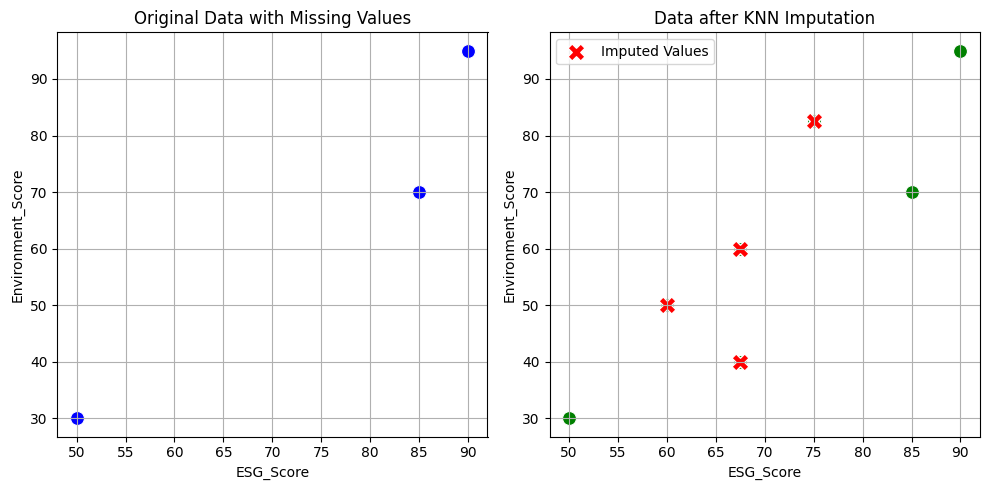

In [11]:
# Scatter plot of the original data with missing values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='ESG_Score', y='Environment_Score', data=df, marker='o', color='blue', s=100)
plt.title('Original Data with Missing Values')
plt.xlabel('ESG_Score')
plt.ylabel('Environment_Score')
plt.grid(True)

# Scatter plot of the data after KNN imputation
plt.subplot(1, 2, 2)
sns.scatterplot(x='ESG_Score', y='Environment_Score', data=df_imputed, marker='o', color='green', s=100)
plt.title('Data after KNN Imputation')
plt.xlabel('ESG_Score')
plt.ylabel('Environment_Score')
plt.grid(True)

# Highlighting imputed points
imputed_mask = df.isnull().any(axis=1)
sns.scatterplot(x='ESG_Score', y='Environment_Score', data=df_imputed[imputed_mask], marker='X', color='red', s=150, label='Imputed Values')

plt.legend()
plt.tight_layout()
plt.show()

In [30]:
df

,ESG_Score,Environment_Score
0,50.0,30.0
1,NaN,40.0
2,75.0,NaN
3,85.0,70.0
4,NaN,60.0
5,60.0,NaN
6,90.0,95.0


Let's create the same graph but using plotly:

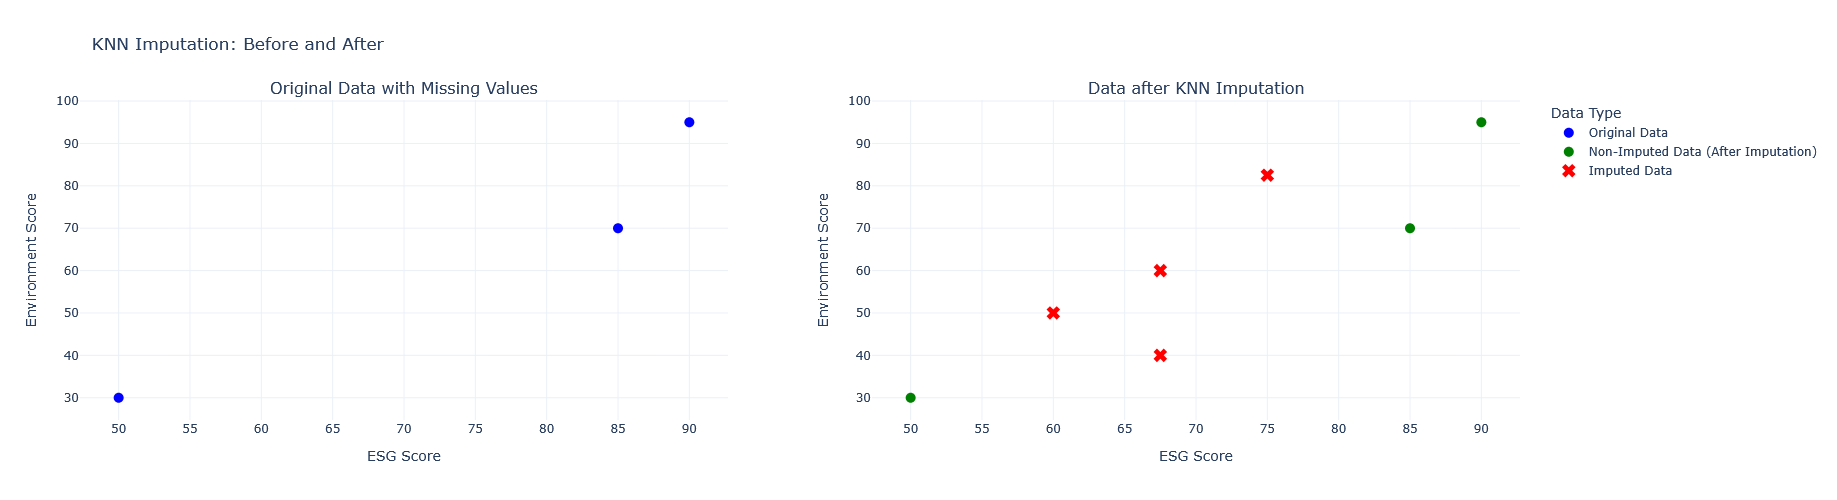

In [12]:
# Separate imputed points
imputed_mask = df.isnull().any(axis=1)
df_imputed['Imputed'] = imputed_mask

# Create subplots: one for original data and one for imputed data
fig = make_subplots(rows=1, cols=2, subplot_titles=("Original Data with Missing Values", "Data after KNN Imputation"))

# Plot original data (with missing values) in the first subplot
fig.add_trace(
    go.Scatter(
        x=df['ESG_Score'], 
        y=df['Environment_Score'], 
        mode='markers', 
        name='Original Data',
        marker=dict(color='blue', size=10),
        text=['Original' for _ in range(len(df))]
    ),
    row=1, col=1
)

# Plot non-imputed data (already present, not imputed) in the second subplot
fig.add_trace(
    go.Scatter(
        x=df_imputed.loc[~imputed_mask, 'ESG_Score'], 
        y=df_imputed.loc[~imputed_mask, 'Environment_Score'], 
        mode='markers', 
        name='Non-Imputed Data (After Imputation)',
        marker=dict(color='green', size=10, symbol='circle'),
        text=['Non-Imputed' for _ in range(sum(~imputed_mask))]
    ),
    row=1, col=2
)

# Highlight imputed points in the second subplot
fig.add_trace(
    go.Scatter(
        x=df_imputed.loc[imputed_mask, 'ESG_Score'], 
        y=df_imputed.loc[imputed_mask, 'Environment_Score'], 
        mode='markers', 
        name='Imputed Data',
        marker=dict(color='red', size=12, symbol='x'),
        text=['Imputed' for _ in range(sum(imputed_mask))]
    ),
    row=1, col=2
)

# Update the layout for better visualization, setting a smaller width
fig.update_layout(
    title_text="KNN Imputation: Before and After",
    width=1200,  # Adjust the figure width here
    height=500,  # You can also adjust height if necessary
    xaxis_title="ESG Score",
    yaxis_title="Environment Score",
    legend_title="Data Type",
    template="plotly_white"
)

# Set axis titles for each subplot
fig.update_xaxes(title_text="ESG Score", row=1, col=1)
fig.update_yaxes(title_text="Environment Score", row=1, col=1)
fig.update_xaxes(title_text="ESG Score", row=1, col=2)
fig.update_yaxes(title_text="Environment Score", row=1, col=2)

fig.show()

In [13]:
df

,ESG_Score,Environment_Score
0,50.0,30.0
1,NaN,40.0
2,75.0,NaN
3,85.0,70.0
4,NaN,60.0
5,60.0,NaN
6,90.0,95.0


Explanation:
- On the left side, you will see the original data with missing values.
- On the right side, after KNN imputation, you will see the imputed values. The points that were missing are now filled based on the average of the two nearest neighbors.

#### 3D visualization

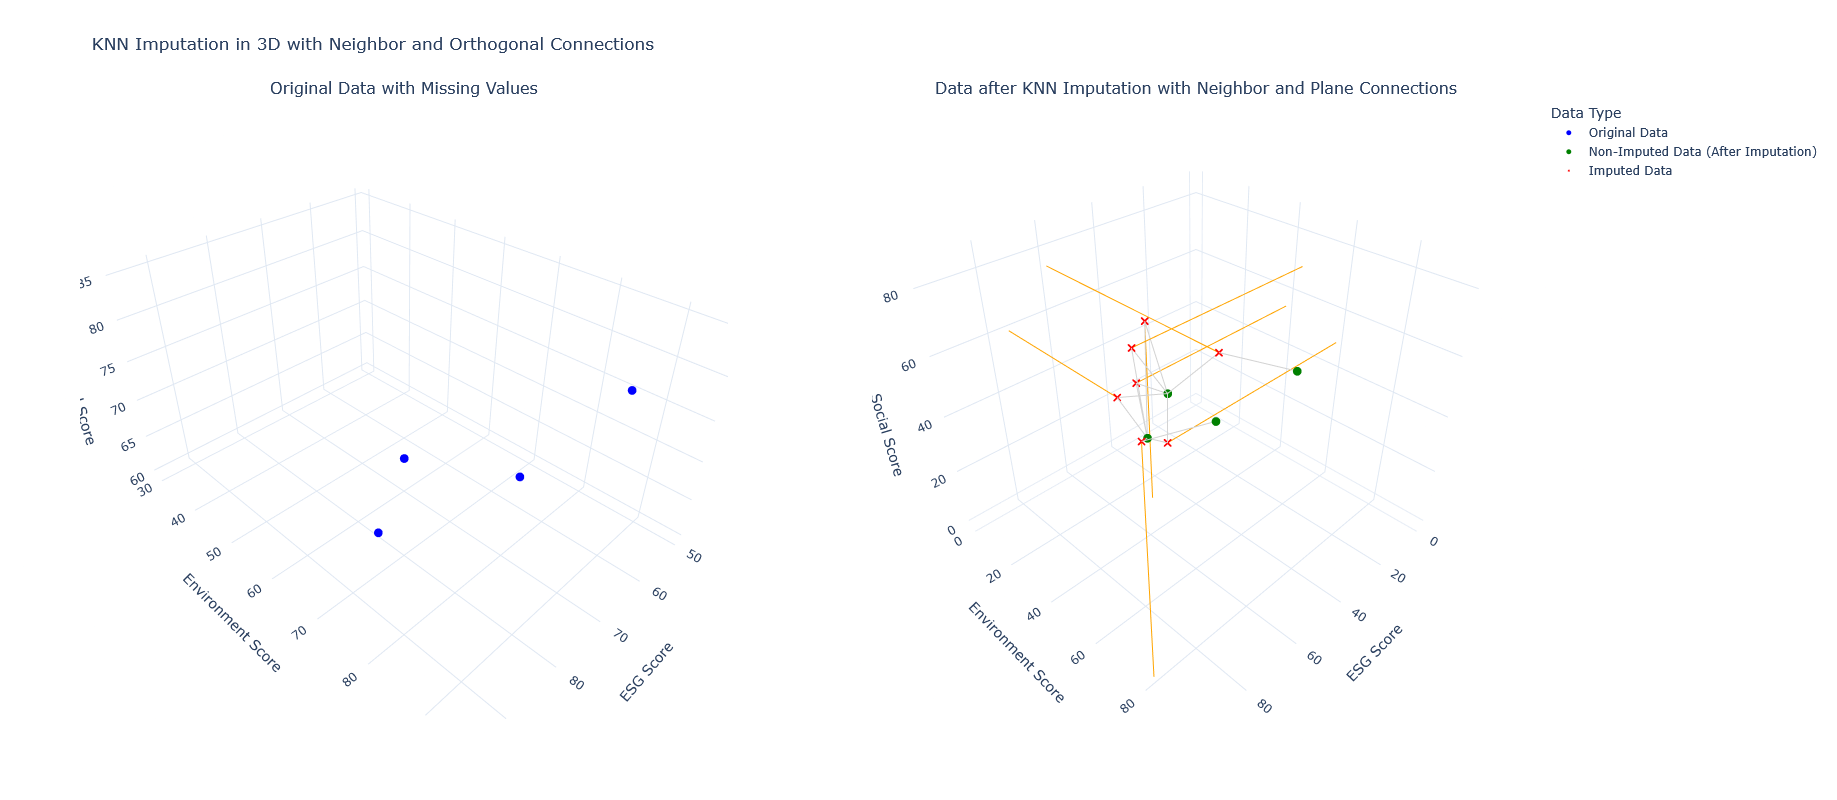

In [14]:
# Larger sample dataset with missing values
data = {
    'ESG_Score':         [50,     np.nan, 75,     85, np.nan, 60,     90, 95,     65, np.nan, 60],
    'Environment_Score': [30,     40,     np.nan, 70, 60,     np.nan, 95, 80,     55, 45,     90],
    'Social_Score':      [np.nan, 55,     60,     65, 50,     75,     85, np.nan, 60, 70,     80]
}

df = pd.DataFrame(data)

# Apply KNN Imputation
knn_imputer = KNNImputer(n_neighbors=2)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

# Separate imputed points
imputed_mask = df.isnull().any(axis=1)
df_imputed['Imputed'] = imputed_mask

# Convert DataFrame to NumPy array for NearestNeighbors
non_imputed_data = df_imputed[~imputed_mask][['ESG_Score', 'Environment_Score', 'Social_Score']].values

# Fit NearestNeighbors using the non-imputed points
knn = NearestNeighbors(n_neighbors=2)
knn.fit(non_imputed_data)  # Fit on the non-imputed data as a NumPy array

# Create a 3D scatter plot with connections to neighbors
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=("Original Data with Missing Values", "Data after KNN Imputation with Neighbor and Plane Connections")
)

# 3D scatter for original data (with missing values)
fig.add_trace(
    go.Scatter3d(
        x=df['ESG_Score'],
        y=df['Environment_Score'],
        z=df['Social_Score'],
        mode='markers',
        name='Original Data',
        marker=dict(color='blue', size=5),
        text=['Original' for _ in range(len(df))]
    ),
    row=1, col=1
)

# 3D scatter for non-imputed data (after imputation)
fig.add_trace(
    go.Scatter3d(
        x=df_imputed.loc[~imputed_mask, 'ESG_Score'],
        y=df_imputed.loc[~imputed_mask, 'Environment_Score'],
        z=df_imputed.loc[~imputed_mask, 'Social_Score'],
        mode='markers',
        name='Non-Imputed Data (After Imputation)',
        marker=dict(color='green', size=5),
        text=['Non-Imputed' for _ in range(sum(~imputed_mask))]
    ),
    row=1, col=2
)

# 3D scatter for imputed points
fig.add_trace(
    go.Scatter3d(
        x=df_imputed.loc[imputed_mask, 'ESG_Score'],
        y=df_imputed.loc[imputed_mask, 'Environment_Score'],
        z=df_imputed.loc[imputed_mask, 'Social_Score'],
        mode='markers',
        name='Imputed Data',
        marker=dict(color='red', size=2, symbol='x'),
        text=['Imputed' for _ in range(sum(imputed_mask))]
    ),
    row=1, col=2
)

# Connect imputed points to their nearest neighbors using light grey lines
for i, (x_imputed, y_imputed, z_imputed) in df_imputed.loc[imputed_mask, ['ESG_Score', 'Environment_Score', 'Social_Score']].iterrows():
    # Find the nearest neighbors of the imputed point
    distances, neighbors = knn.kneighbors([[x_imputed, y_imputed, z_imputed]])
    
    for neighbor_idx in neighbors[0]:
        x_neighbor = df_imputed.loc[~imputed_mask].iloc[neighbor_idx]['ESG_Score']
        y_neighbor = df_imputed.loc[~imputed_mask].iloc[neighbor_idx]['Environment_Score']
        z_neighbor = df_imputed.loc[~imputed_mask].iloc[neighbor_idx]['Social_Score']
        
        # Draw a line from the imputed point to the neighbor
        fig.add_trace(
            go.Scatter3d(
                x=[x_imputed, x_neighbor],
                y=[y_imputed, y_neighbor],
                z=[z_imputed, z_neighbor],
                mode='lines',
                line=dict(color='lightgrey', width=2),
                showlegend=False
            ),
            row=1, col=2
        )

# Add orthogonal lines anchoring each imputed point to the plane where they have non-missing coordinates
for i, (x_imputed, y_imputed, z_imputed) in df_imputed.loc[imputed_mask, ['ESG_Score', 'Environment_Score', 'Social_Score']].iterrows():
    # If ESG_Score was missing, connect it to the plane of Environment_Score and Social_Score
    if pd.isna(df.loc[i, 'ESG_Score']):
        fig.add_trace(
            go.Scatter3d(
                x=[0, x_imputed], y=[y_imputed, y_imputed], z=[z_imputed, z_imputed],
                mode='lines',
                line=dict(color='orange', width=2),
                showlegend=False
            ),
            row=1, col=2
        )
    # If Environment_Score was missing, connect it to the plane of ESG_Score and Social_Score
    if pd.isna(df.loc[i, 'Environment_Score']):
        fig.add_trace(
            go.Scatter3d(
                x=[x_imputed, x_imputed], y=[0, y_imputed], z=[z_imputed, z_imputed],
                mode='lines',
                line=dict(color='orange', width=2),
                showlegend=False
            ),
            row=1, col=2
        )
    # If Social_Score was missing, connect it to the plane of ESG_Score and Environment_Score
    if pd.isna(df.loc[i, 'Social_Score']):
        fig.add_trace(
            go.Scatter3d(
                x=[x_imputed, x_imputed], y=[y_imputed, y_imputed], z=[0, z_imputed],
                mode='lines',
                line=dict(color='orange', width=2),
                showlegend=False
            ),
            row=1, col=2
        )

# Update layout for better visualization
fig.update_layout(
    title_text="KNN Imputation in 3D with Neighbor and Orthogonal Connections",
    width=1400,
    height=800,
    scene=dict(
        xaxis_title="ESG Score",
        yaxis_title="Environment Score",
        zaxis_title="Social Score"
    ),
    scene2=dict(
        xaxis_title="ESG Score",
        yaxis_title="Environment Score",
        zaxis_title="Social Score"
    ),
    legend_title="Data Type",
    template="plotly_white"
)

# Show the plot
fig.show()


In [15]:
df

,ESG_Score,Environment_Score,Social_Score
0,50.0,30.0,NaN
1,NaN,40.0,55.0
2,75.0,NaN,60.0
3,85.0,70.0,65.0
4,NaN,60.0,50.0
5,60.0,NaN,75.0
6,90.0,95.0,85.0
7,95.0,80.0,NaN
8,65.0,55.0,60.0
9,NaN,45.0,70.0
